In [1]:
# Ejemplo 1
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

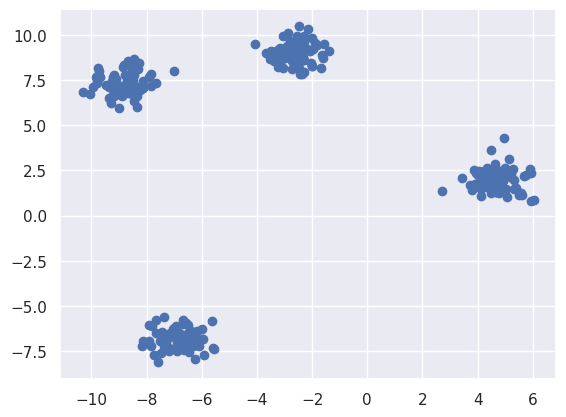

In [7]:
X, y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=42)
plt.scatter(X[:,0],X[:,1])

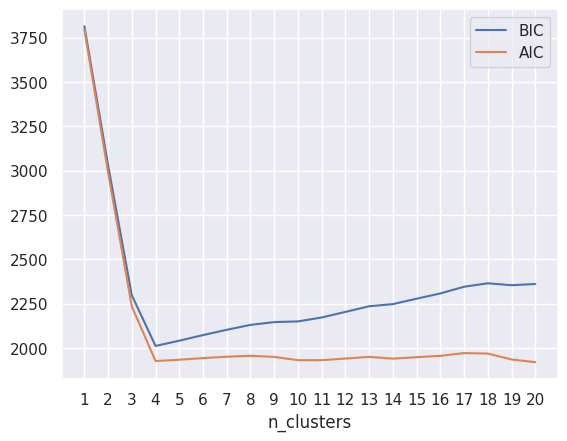

In [10]:
# El número óptimo de grupos es el valor que minimiza el
# criterio de información de Akike (AIC) o el criterio Bayesiano (BIC)
# https://en.wikipedia.org/wiki/Akaike_information_criterion
# https://en.wikipedia.org/wiki/Bayesian_information_criterion
n_clusters = np.arange(1, 21)
models = [GaussianMixture(n,covariance_type='full',random_state=42).fit(X) for n in n_clusters]
plt.plot(n_clusters, [m.bic(X) for m in models], label='BIC')
plt.plot(n_clusters, [m.aic(X) for m in models], label='AIC')
plt.xticks(n_clusters)
plt.legend(loc='best')
plt.xlabel('n_clusters')
plt.grid(True)
plt.show()

In [11]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

,n_components,4
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


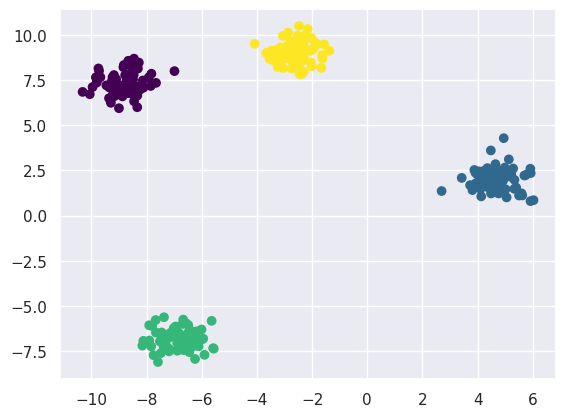

In [14]:
y_pred = gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='viridis')

In [15]:
# Datos
X_train = np.load('../dataSets/data.npy')

In [16]:
X_train.shape

(200, 2)

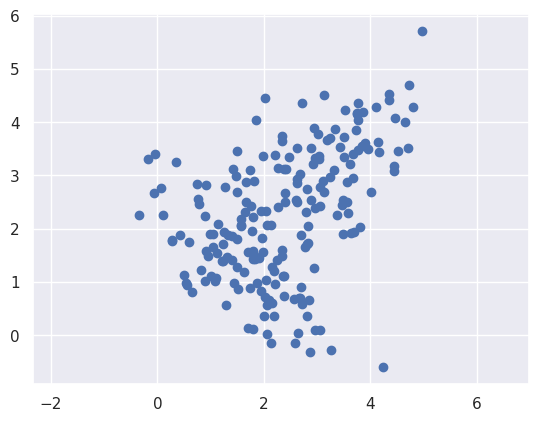

In [23]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.axis('equal')
plt.show()

In [24]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)
print("Medias: \n", gmm.means_)
print("Covarianzas: \n",gmm.covariances_)

Medias: 
 [[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]
Covarianzas: 
 [[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


(2500, 2)


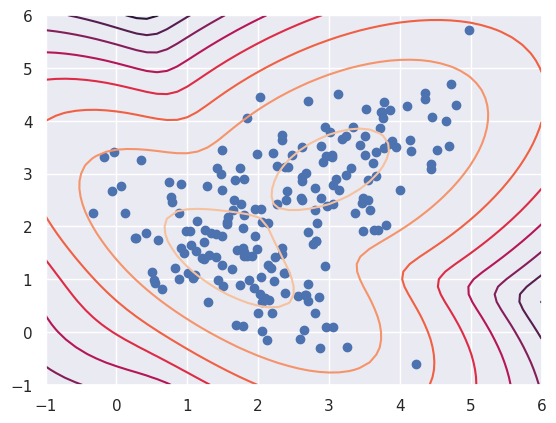

In [ ]:
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(),Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()